This notebook is intended to adjust a simple model on Q - P relationship for Ke estimates

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## Load some data

In [2]:
data_ag_file = "/home/hectorb/ADMIN/TEAM/Mahamadi/data/data_BH_1D_2D/Pluie-Le_après-Aménagement.csv"
data_ag = pd.read_csv(data_ag_file)

<AxesSubplot:xlabel='Pluie (mm)', ylabel='LR_avant'>

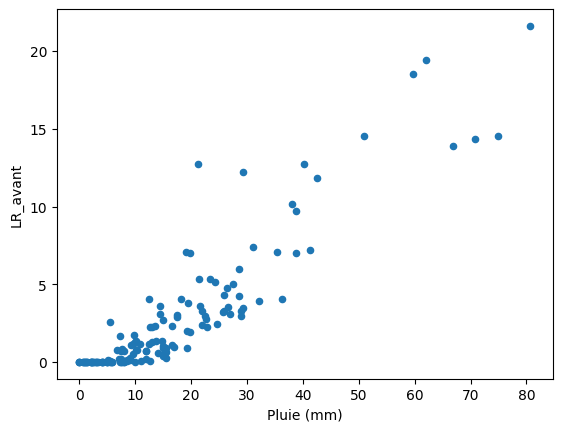

In [3]:
data_ag.plot.scatter(x='Pluie (mm)',y = 'LR_avant')

In [31]:
Q_P = data_ag.loc[:,['Pluie (mm)','LR_avant']]

In [32]:
Q_P.rename(columns = {'Pluie (mm)':'P','LR_avant':'Q'},inplace=True)

In [33]:
Q_P.set_index('P',inplace=True)

AttributeError: 'NoneType' object has no attribute 'dropna'

In [34]:
Q_P.dropna(inplace=True)

## define a model

type "on python how to define a two parameters custom model and fit it on some dataset and show the model on a scatter plot together with the data and performance metrics?" on chatGPT ;)

In [45]:
# Define a custom model function with two parameters
def custom_model(params, X):
    pente, seuil = params
    return np.where(X>=seuil,pente * X -seuil*pente,0)

# Define a loss function to minimize (e.g., mean squared error)
def loss_function(params, X, y):
    y_pred = custom_model(params, X)
    return mean_squared_error(y, y_pred)

In [46]:
# Initial guess for the parameters
initial_params = [0.3, 9]

In [47]:
# Fit the model parameters to the data using optimization
from scipy.optimize import minimize
result = minimize(loss_function, initial_params, args=(Q_P.index,Q_P))


In [48]:
# Extract the optimized parameters
optimized_params = result.x


In [49]:
optimized_params

array([0.27578802, 8.07901363])

seuil: 8.08 mm
pente: 27.6 %
Mean Squared Error:2.90


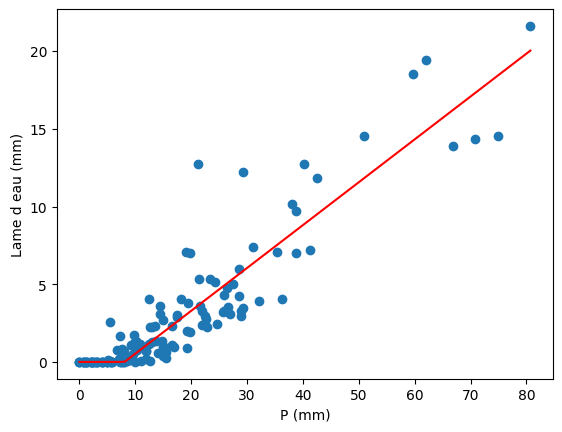

In [68]:

# Plot the data and the fitted model
plt.scatter(Q_P.index,Q_P, label='Data')
plt.xlabel('P (mm)')
plt.ylabel('Lame d eau (mm)')

# Plot the fitted model
X_range = np.linspace(min(Q_P.index), max(Q_P.index), 100)
y_pred = custom_model(optimized_params, X_range)
plt.plot(X_range, y_pred, color='red', label='Fitted Model')

# Calculate and print performance metrics
mse = mean_squared_error(Q_P, custom_model(optimized_params, Q_P.index))

print("seuil: %2.2f mm"%optimized_params[1])
print("pente: %2.1f %%"%(optimized_params[0]*100))


print("Mean Squared Error:%2.2f"%mse)
